In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Gerekli olan kütüphaneleri etkinleştirdik 

In [93]:
df = pd.read_csv("Penguen.csv")
df.head()

# DataFrame' in neler içerdiğine bakıyoruz.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [94]:
df.shape

# DataFrame de columnlarına ve satır değerlerine bakıyoruz.Kaç değerden oluştuğuna

(344, 7)

In [95]:
df.info()

# null değerler içeriyormu diye baktık ve bazı columnlarda null değerler mevcut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [110]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

# Yukarda info() da öğrendiiğğimiz null olan numrik değerleri o columnların ortalamaları ile doldurduk fakat "sex" columnu str değer olduğu için ona dokunmadık 

C:\Users\kulme\AppData\Local\Temp\ipykernel_14136\2446100705.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [98]:
df.describe()

# Verinin otralamasına, standart, sapmasnına, min ve  max değerlerine baktık.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [99]:
df.corr()

# columnlar arasındanki ilişkiye baktık ve kimi columlarda değerler birbirine yakınken kimi değerler de birbirinden o kadar uzak 

C:\Users\kulme\AppData\Local\Temp\ipykernel_14136\476662691.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Text(0.5, 1.0, 'TÜRLERE GÖRE % GRAFİK ORANI')

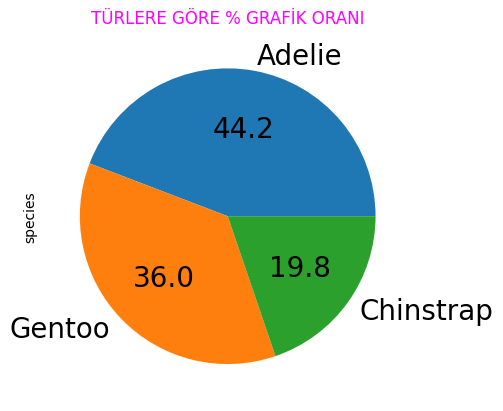

In [100]:
df.species.value_counts().plot(kind = "pie",
                              autopct = "%1.1f",
                               fontsize = 20 )
plt.title("TÜRLERE GÖRE % GRAFİK ORANI" , color = "magenta")

# türlerin dağılımına baktık en çok Adelie mevcutmuş 

Text(0.5, 1.0, 'CİNSİYETE GÖRE % GRAFİĞİ')

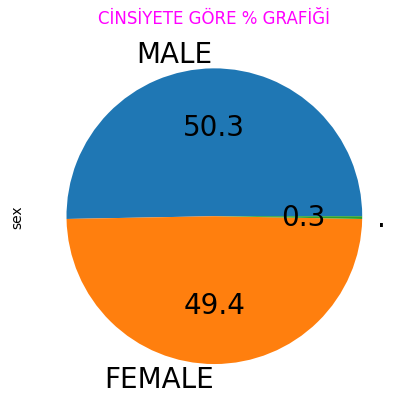

In [101]:
df.sex.value_counts().plot(kind = "pie",
                              autopct = "%1.1f",
                              fontsize = 20)
plt.title("CİNSİYETE GÖRE % GRAFİĞİ" , color = "magenta")

# cinsiyet dağılımına baktık ve nerdeyse aynı %'lik oranlara sahipler çok fazla bir fark mevcut değil bunun yanı sıra "." değer içeriyorumuş 

In [102]:
df.replace("." , np.nan , inplace = True) 

# "." olan değerleri numpy'ın nan değerini çağırarak null değer yaptık ki ilerdi belki drop işlemi yaparsak işimizi görür "." bizim işimize yaramaz.

Text(0.5, 1.0, 'ADALARA GÖRE % GRAFİĞİ')

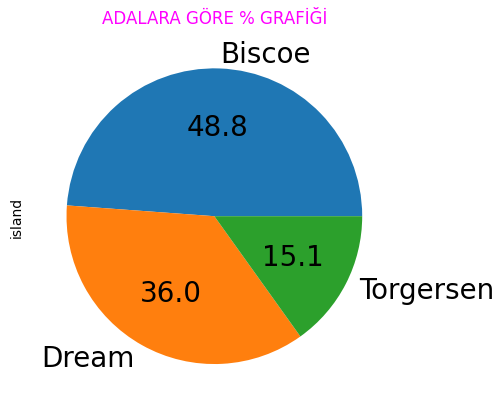

In [103]:
df.island.value_counts().plot(kind = "pie",
                              autopct = "%1.1f",
                               fontsize = 20 )
plt.title("ADALARA GÖRE % GRAFİĞİ" , color = "magenta")

# Adalarına göre dağılımlarında en çok "BİSCOE" de bulunuyormuş

<Axes: title={'center': 'BÖLGELERİNE GÖRE DAĞILIM GRAFİĞİ'}, ylabel='island'>

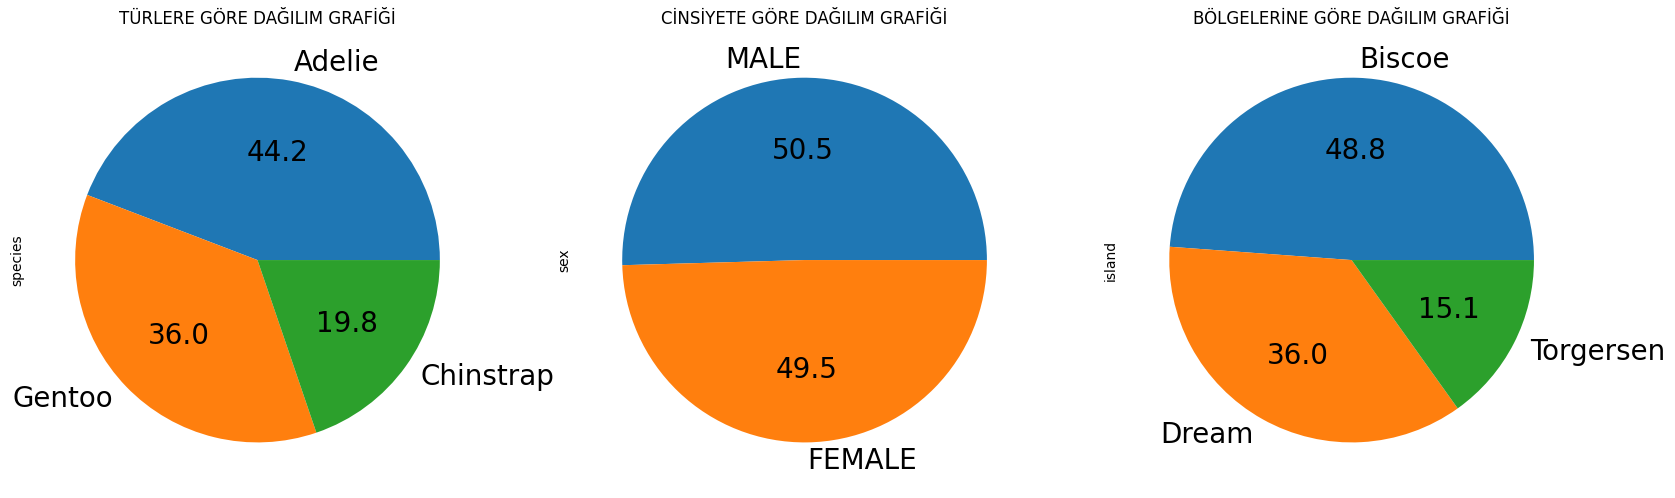

In [104]:
fig, axes = plt.subplots(1,3 , figsize = (20,6))

df.species.value_counts().plot(kind = "pie",
                              autopct = "%1.1f",
                               ax=axes[0] , title = "TÜRLERE GÖRE DAĞILIM GRAFİĞİ" , fontsize= 20 )

df.sex.value_counts().plot(kind = "pie",
                              autopct = "%1.1f",
                            ax = axes[1], title = "CİNSİYETE GÖRE DAĞILIM GRAFİĞİ" , fontsize= 20)
df.island.value_counts().plot(kind = "pie",
                              autopct = "%1.1f",
                              ax = axes[2], title = "BÖLGELERİNE GÖRE DAĞILIM GRAFİĞİ" , fontsize= 20)

# burdan subplot yaparak hepsini bir araya topladık ki hepsi üzerinden daha rahat değerlendirme yapalım 

## Türlere göre en çok "ADELİE" mevcut , cinsiyerine göre %' lik oranlar neredeyse aynı , bölgelerine göre en çok "BİSCOE" bölgesinde mevutmuş 

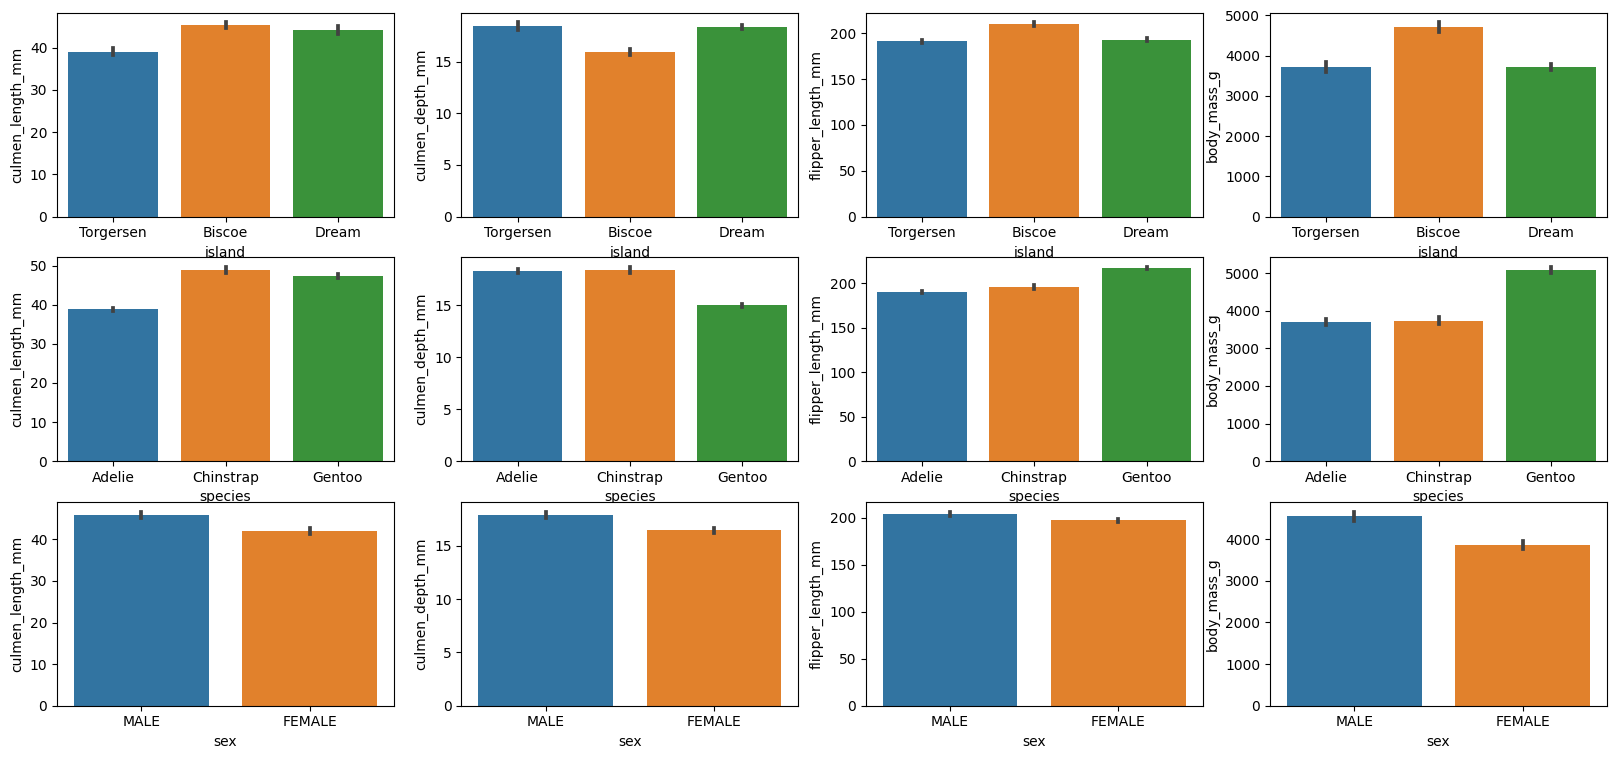

In [112]:
fig, axes = plt.subplots(3,4 , figsize = (20,9))

sns.barplot(data = df , x = "island" , y = "culmen_length_mm",
                               ax=axes[0,0])

sns.barplot(data = df , x = "island" , y = "culmen_depth_mm",
                               ax=axes[0,1])

sns.barplot(data = df , x = "island" , y = "flipper_length_mm",
                               ax=axes[0,2])

sns.barplot(data = df , x = "island" , y = "body_mass_g",
                               ax=axes[0,3])

sns.barplot(data = df , x = "species" , y = "culmen_length_mm",
                               ax=axes[1,0])

sns.barplot(data = df , x = "species" , y = "culmen_depth_mm",
                               ax=axes[1,1])

sns.barplot(data = df , x = "species" , y = "flipper_length_mm",
                               ax=axes[1,2])

sns.barplot(data = df , x = "species" , y = "body_mass_g",
                               ax=axes[1,3])

sns.barplot(data = df , x = "sex" , y = "culmen_length_mm",
                               ax=axes[2,0])

sns.barplot(data = df , x = "sex" , y = "culmen_depth_mm",
                               ax=axes[2,1])

sns.barplot(data = df , x = "sex" , y = "flipper_length_mm",
                               ax=axes[2,2])

sns.barplot(data = df , x = "sex" , y = "body_mass_g",
                               ax=axes[2,3])

plt.show()

# Barplot kullanarak DataFramedeki string değerler içeren columnların("species" , "island" , "sex") numerik değerler içeren columnlara("culmen_length_mm" , "culmen_depth_mm" , "flipper_length_mm" , "body_mass_g") göre barplot grafiklerini bir araya topladık 
# Adalara göre karşılaştırdığımızda en yüksek gaga uzunluğu, kanat uzunluğu ve kütleye sahip olan penguenlerin "Biscoe" adasında olduğunu gördük. Fakat gaga derinliği en düşük olan penguenler de yine "Biscoe" adasındadır.
# Türlerine göre karşılaştırdığımızda "Gentoo" türü penguenin en yüksek kütleye ve kanat uzunluğuna sahip olduğunu görüyoruz. En yüksek gaga uzunluğuna ve gaga genişliğine sahip olan penguen türünün ise "Chinstrap" türü penguen olduğunu görüyoruz.
# Cinsiyetine göre karşılaştırdığımızda en yüksek değerlerin "MALE" penguenlerde olduğunu görüyoruz.


Text(0.5, 1.0, 'GAGA UZUNLUĞU')

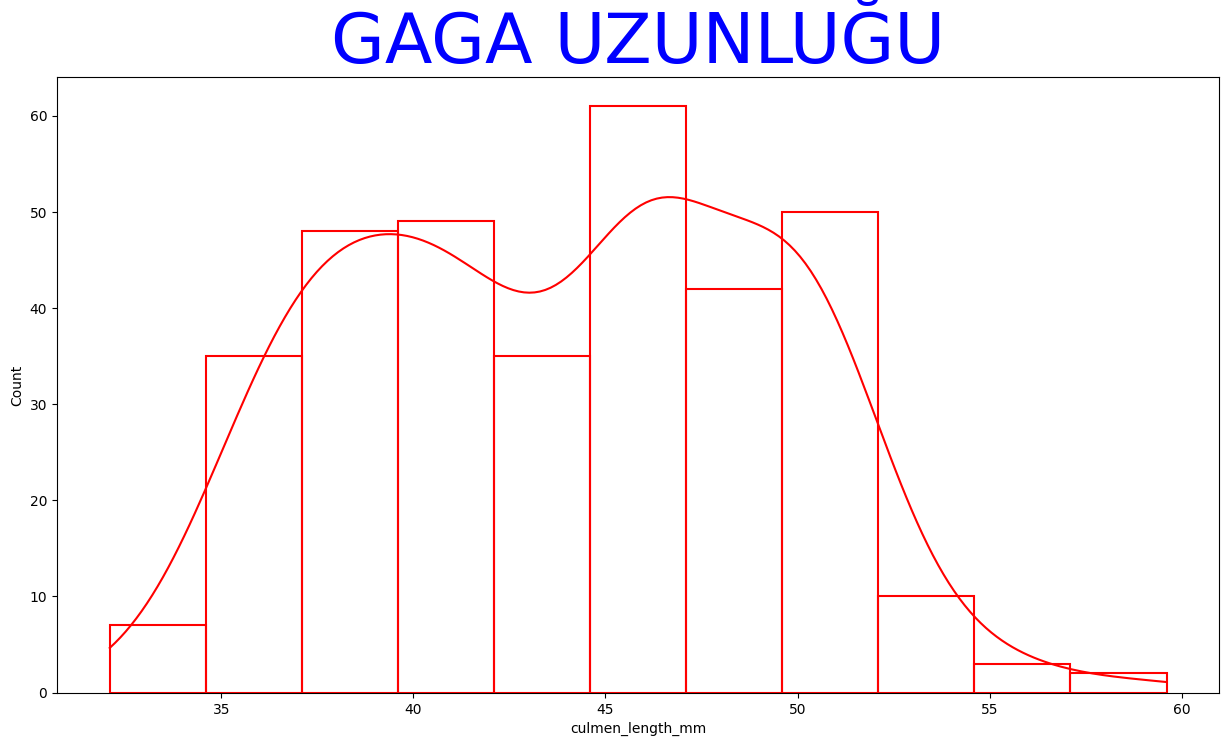

In [106]:
plt.figure(figsize = (15,8))

sns.histplot(data = df , x = "culmen_length_mm", kde = True ,
              color = "red" , fill=False)

plt.title("GAGA UZUNLUĞU" , color = "blue" , size = 20 , fontsize = 50)

# Penguenleri gaga uzunluğuna göre göre sayım yaptırdık 
# Gaga uzunluğunun 44-47 arasında olan penguenlerin daha fazla olduğunu gözlemledik. Az olan penguenlerin sayısının gaga uzunluklarının 35 den küçük 52 den yüksek olduğunu gözrüyoruz.

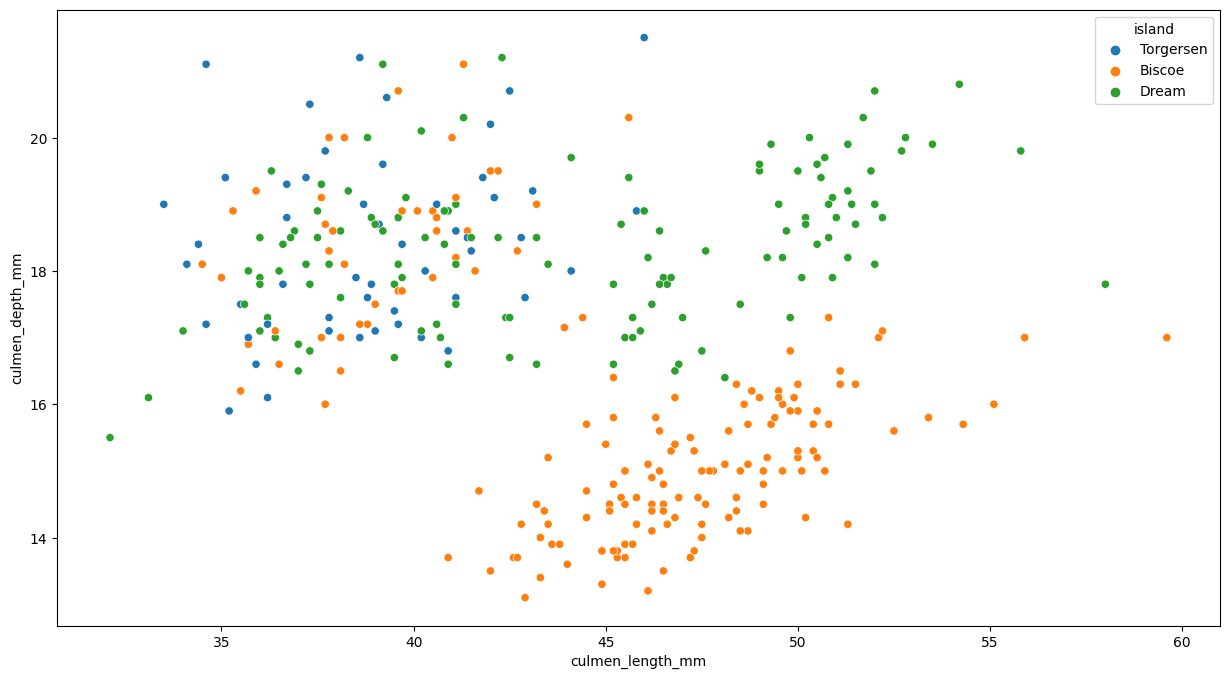

In [122]:
plt.figure(figsize = (15,8))

sns.scatterplot(data = df , x = "culmen_length_mm" , y = "culmen_depth_mm" , hue = "island")

plt.show()

# Adalara göre gaga uzunluğunu ve gaga genişliğine göre scatterplot yardımı ile görüntüledik.

<Axes: xlabel='species', ylabel='culmen_depth_mm'>

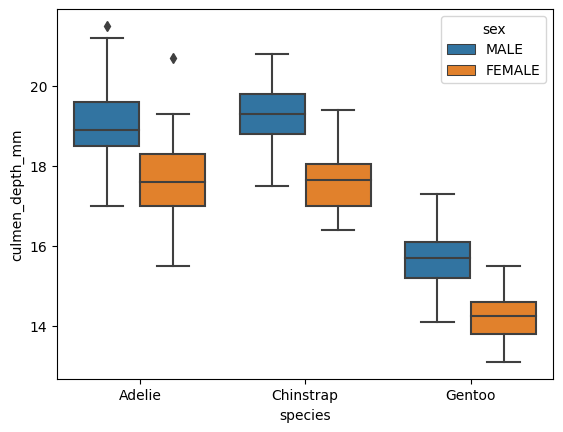

In [123]:
sns.boxplot(data = df , x = "species" , y = "culmen_depth_mm" , hue="sex")

# cisnsiyetlerine göre türlerinin gaga derinliklerine baktık 
## genel itibari ile "MALE" olanların oranları daha fazla 
### "GENTOO" türünün hem "MALE" hem de "FEMALE" oranları diğerlerine göre daha düşük değerler almakta 


In [1]:
# Done

# Metehan KUL ve Emre DEMİRCİOĞLU